# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [2]:
!pip install chart_studio 

     |████████████████████████████████| 81kB 6.9MB/s 


In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

Output hidden; open in https://colab.research.google.com to view.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.1 Reading Data

In [0]:
project_data = pd.read_csv('/content/drive/My Drive/Assignments_DonorsChoose_2018/train_data.csv')
resource_data = pd.read_csv('/content/drive/My Drive/Assignments_DonorsChoose_2018/resources.csv')

In [6]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [7]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1


In [8]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [12]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...


In [13]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [15]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [16]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [17]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [19]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [01:03<00:00, 1713.21it/s]


In [20]:
# after preprocesing
preprocessed_essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [21]:
# similarly you can preprocess the titles also
preprocessed_title=[]
for title in tqdm(project_data['project_title']):
  trutil=decontracted(title)
  trutil=re.sub('\\r', ' ',trutil)
  trutil=re.sub('\\"', ' ',trutil)
  trutil=re.sub('\\n', ' ',trutil)
  trutil=' '.join(f for f in trutil.split() if f not in stopwords)
  preprocessed_title.append(trutil.lower().strip())

100%|██████████| 109248/109248 [00:02<00:00, 39373.22it/s]



   - project_title : text data
   - text : text data
   - project_resource_summary: text data (optinal)

   - quantity : numerical (optinal)
   - teacher_number_of_previously_posted_projects : numerical
   - price : numerical


In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [23]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

__ Computing Sentiment Scores__

In [24]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

In [25]:
sentiments  = []
for sentence in tqdm(preprocessed_essays):
    sentiment_vec = np.zeros(4)
    temp=0; 
    sw=sid.polarity_scores(sentence)
    #print(sw)
    for b in sw:
      sentiment_vec[temp]=sw[b]
      temp=temp+1
    sentiments.append(sentiment_vec)

print(len(sentiments))
print(len(sentiments[0]))

100%|██████████| 109248/109248 [03:22<00:00, 540.54it/s]

109248
4


In [26]:
NumWordTit=[]
TotNumWord=[]
for tit in tqdm(preprocessed_title):
  NumWordTit.append(len(tit))
temp=0
for tot in tqdm(preprocessed_essays):
  TotNumWord.append(NumWordTit[temp]+len(tot))
  #print(str(NumWordTit[temp])+"+"+str(len(tot)))
  temp=temp+1

100%|██████████| 109248/109248 [00:00<00:00, 1264716.19it/s]


# Assignment 5: Logistic Regression

<ol>
    <li><strong>[Task-1] Logistic Regression(either SGDClassifier with log loss, or LogisticRegression) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply Logistic Regression on the below feature set <font color='red'> Set 5 </font> by finding the best hyper parameter as suggested in step 2 and step 3.</strong>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
            </ul>
        And apply the Logistic regression on these features by finding the best hyper paramter as suggested in step 2 and step 3 <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Logistic Regression </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
from sklearn.model_selection import train_test_split
skool=project_data['school_state'].values
clen_cat=project_data['clean_categories'].values
clen_scat=project_data['clean_subcategories'].values
gra_cat=project_data['project_grade_category'].values
tea_fix=project_data['teacher_prefix'].values
tea_pre=project_data['teacher_number_of_previously_posted_projects'].values
price=project_data['price'].values
appr=project_data['project_is_approved'].values
skool_train,skool_test,clen_cat_train,clen_cat_test,clen_scat_train,clen_scat_test,gra_cat_train,gra_cat_test,tea_fix_train,tea_fix_test,tea_pre_train,tea_pre_test,text_train,text_test,tit_train,tit_test,price_train,price_test,senti_train,senti_test,tnum_train,tnum_test,tonum_train,tonum_test,out_train,out_test=train_test_split(skool,clen_cat,clen_scat,gra_cat,tea_fix,tea_pre,preprocessed_essays,preprocessed_title,price,sentiments,NumWordTit,TotNumWord,appr,test_size=0.33)
skool_train,skool_cv,clen_cat_train,clen_cat_cv,clen_scat_train,clen_scat_cv,gra_cat_train,gra_cat_cv,tea_fix_train,tea_fix_cv,tea_pre_train,tea_pre_cv,text_train,text_cv,tit_train,tit_cv,price_train,price_cv,senti_train,senti_cv,tnum_train,tnum_cv,tonum_train,tonum_cv,out_train,out_cv=train_test_split(skool_train,clen_cat_train,clen_scat_train,gra_cat_train,tea_fix_train,tea_pre_train,text_train,tit_train,price_train,senti_train,tnum_train,tonum_train,out_train,test_size=0.33)
#tea_fix_train,tea_fix_test,tea_pre_train,tea_pre_test,text_train,text_test,tit_train,tit_test,price_train,price_test=train_test_split(tea_fix,tea_pre,preprocessed_essays,preprocessed_title,price,test_size=0.33)
#tea_fix_train,tea_fix_cv,tea_pre_train,tea_pre_cv,text_train,text_cv,tit_train,tit_cv,price_train,price_cv=train_test_split(tea_fix_train,tea_pre_train,text_train,tit_train,price_train,test_size=0.33)

In [28]:
catogories = clen_cat_train
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    


from collections import Counter
my_counter = Counter()
for word in catogories:
    my_counter.update(word.split())
cat_dict1 = dict(my_counter)
sorted_cat_dict1 = dict(sorted(cat_dict1.items(), key=lambda kv: kv[1]))
print(sorted_cat_dict1['History_Civics'])


2572


In [29]:
catogories = clen_scat_train
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    


from collections import Counter
my_counter = Counter()
for word in catogories:
    my_counter.update(word.split())
scat_dict = dict(my_counter)
sorted_scat_dict = dict(sorted(scat_dict.items(), key=lambda kv: kv[1]))
print(sorted_scat_dict['Literature_Writing'])


10081


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

### 1.5.1 Vectorizing Categorical data

In [30]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict1.keys()), lowercase=False, binary=True)
vectorizer.fit(clen_cat_train)
cat1hot_train = vectorizer.transform(clen_cat_train)
cat1hot_cv = vectorizer.transform(clen_cat_cv)
cat1hot_test= vectorizer.transform(clen_cat_test)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",cat1hot_train.shape)
print("Shape of matrix after one hot encodig ",cat1hot_cv.shape)
print("Shape of matrix after one hot encodig ",cat1hot_test.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (49041, 9)
Shape of matrix after one hot encodig  (24155, 9)
Shape of matrix after one hot encodig  (36052, 9)


In [31]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_scat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(clen_scat_train)
cats1hot_train = vectorizer.transform(clen_scat_train)
cats1hot_cv = vectorizer.transform(clen_scat_cv)
cats1hot_test= vectorizer.transform(clen_scat_test)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",cats1hot_train.shape)
print("Shape of matrix after one hot encodig ",cats1hot_cv.shape)
print("Shape of matrix after one hot encodig ",cats1hot_test.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Civics_Government', 'Extracurricular', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'History_Geography', 'Music', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (49041, 30)
Shape of matrix after one hot encodig  (24155, 30)
Shape of matrix after one hot encodig  (36052, 30)


In [0]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

In [33]:
dataf=pd.Categorical(tea_fix_train)
tfix_train=pd.get_dummies(dataf)
dataf=pd.Categorical(tea_fix_test)
tfix_test=pd.get_dummies(dataf)
dataf=pd.Categorical(tea_fix_cv)
tfix_cv=pd.get_dummies(dataf)
print(tfix_cv.shape)
print(tfix_train.shape)
print(tfix_test.shape)

(24155, 5)
(49041, 5)
(36052, 5)


In [34]:
#code from http://www.insightsbot.com/blog/zuyVu/python-one-hot-encoding-with-pandas-made-simple
#feature encoding for school state
dataf=pd.Categorical(skool_train)
skools_train=pd.get_dummies(dataf)
dataf=pd.Categorical(skool_test)
skools_test=pd.get_dummies(dataf)
dataf=pd.Categorical(skool_cv)
skools_cv=pd.get_dummies(dataf)
print(skools_cv.shape)
print(skools_train.shape)
print(skools_test.shape)

(24155, 51)
(49041, 51)
(36052, 51)


In [35]:
dataf=pd.Categorical(gra_cat_train)
gra_train=pd.get_dummies(dataf)
dataf=pd.Categorical(gra_cat_test)
gra_test=pd.get_dummies(dataf)
dataf=pd.Categorical(gra_cat_cv)
gra_cv=pd.get_dummies(dataf)
print(gra_cv.shape)
print(gra_train.shape)
print(gra_test.shape)

(24155, 4)
(49041, 4)
(36052, 4)


### 1.5.3 Vectorizing Numerical features

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = Normalizer()
price_scalar.fit(price_train.reshape(-1, 1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
prices_tr = price_scalar.transform(price_train.reshape(-1, 1))

In [0]:
price_scalar = Normalizer()
price_scalar.fit(price_cv.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
prices_cv = price_scalar.transform(price_cv.reshape(-1, 1))

In [0]:
price_scalar = Normalizer()
price_scalar.fit(price_test.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
prices_te = price_scalar.transform(price_test.reshape(-1, 1))

In [0]:
project_scalar = Normalizer()
project_scalar.fit(tea_pre_train.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {project_scalar.mean_[0]}, Standard deviation : {np.sqrt(project_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
pre_tr = project_scalar.transform(tea_pre_train.reshape(-1, 1))

In [0]:
project_scalar = Normalizer()
project_scalar.fit(tea_pre_cv.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {project_scalar.mean_[0]}, Standard deviation : {np.sqrt(project_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
pre_cv = project_scalar.transform(tea_pre_cv.reshape(-1, 1))

In [0]:
project_scalar = Normalizer()
project_scalar.fit(tea_pre_test.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {project_scalar.mean_[0]}, Standard deviation : {np.sqrt(project_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
pre_te = project_scalar.transform(tea_pre_test.reshape(-1, 1))

In [0]:
Num_scalar=Normalizer()
Num_scalar.fit(np.array(tnum_train).reshape(-1,1))
tnum_tr=Num_scalar.transform(np.array(tnum_train).reshape(-1,1))
Num_scalar.fit(np.array(tnum_cv).reshape(-1,1))
tnum_crv=Num_scalar.transform(np.array(tnum_cv).reshape(-1,1))
Num_scalar.fit(np.array(tnum_test).reshape(-1,1))
tnum_te=Num_scalar.transform(np.array(tnum_test).reshape(-1,1))

In [0]:
Tnum_scalar=Normalizer()
Tnum_scalar.fit(np.array(tonum_train).reshape(-1,1))
tonum_tr=Tnum_scalar.transform(np.array(tonum_train).reshape(-1,1))
Tnum_scalar.fit(np.array(tonum_cv).reshape(-1,1))
tonum_crv=Tnum_scalar.transform(np.array(tonum_cv).reshape(-1,1))
Tnum_scalar.fit(np.array(tonum_test).reshape(-1,1))
tonum_te=Tnum_scalar.transform(np.array(tonum_test).reshape(-1,1))

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [45]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
bvectorizer = CountVectorizer(min_df=10)
bvectorizer.fit(text_train)
texttr_bow = bvectorizer.transform(text_train)
textcv_bow = bvectorizer.transform(text_cv)
textte_bow= bvectorizer.transform(text_test)
print("Shape of matrix after one hot encodig ",texttr_bow.shape)

Shape of matrix after one hot encodig  (49041, 12055)


In [0]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

In [47]:
#BOW for title
tbvectorizer = CountVectorizer(min_df=10)
tbvectorizer.fit(tit_train)
titexttr_bow = tbvectorizer.transform(tit_train)
titextcv_bow = tbvectorizer.transform(tit_cv)
titextte_bow= tbvectorizer.transform(tit_test)
print("Shape of matrix after one hot encodig ",titexttr_bow.shape)

Shape of matrix after one hot encodig  (49041, 2095)


#### 1.5.2.2 TFIDF vectorizer

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfvectorizer = TfidfVectorizer(min_df=10)
tfvectorizer.fit(text_train)
texttr_tif = tfvectorizer.transform(text_train)
textcv_tif = tfvectorizer.transform(text_cv)
textte_tif = tfvectorizer.transform(text_test)
print("Shape of matrix after one hot encodig ",texttr_tif.shape)

Shape of matrix after one hot encodig  (49041, 12055)


In [0]:
ttfvectorizer = TfidfVectorizer(min_df=10)
ttfvectorizer.fit(tit_train)
titexttr_tif = ttfvectorizer.transform(tit_train)
titextcv_tif = ttfvectorizer.transform(tit_cv)
titextte_tif= ttfvectorizer.transform(tit_test)

#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('/content/drive/My Drive/Assignments_DonorsChoose_2018/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [51]:
# average Word2Vec for text train
# compute average word2vec for each review.
texttr_aw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(text_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    texttr_aw2v.append(vector)

print(len(texttr_aw2v))
print(len(texttr_aw2v[0]))

100%|██████████| 49041/49041 [00:13<00:00, 3588.55it/s]

49041
300


In [52]:
# average Word2Vec for text cv
# compute average word2vec for each review.
textcv_aw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(text_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    textcv_aw2v.append(vector)

print(len(textcv_aw2v))
print(len(textcv_aw2v[0]))

100%|██████████| 24155/24155 [00:06<00:00, 3568.71it/s]

24155
300


In [53]:
# average Word2Vec for text test
# compute average word2vec for each review.
textte_aw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(text_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    textte_aw2v.append(vector)

print(len(textte_aw2v))
print(len(textte_aw2v[0]))

100%|██████████| 36052/36052 [00:10<00:00, 3596.17it/s]

36052
300


In [54]:
# average Word2Vec for title train
# compute average word2vec for each review.
titr_aw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(tit_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    titr_aw2v.append(vector)

print(len(titr_aw2v))
print(len(titr_aw2v[0]))

100%|██████████| 49041/49041 [00:00<00:00, 67852.34it/s]

49041
300


In [55]:
# average Word2Vec for title cv
# compute average word2vec for each review.
ticv_aw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(tit_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    ticv_aw2v.append(vector)

print(len(ticv_aw2v))
print(len(ticv_aw2v[0]))

100%|██████████| 24155/24155 [00:00<00:00, 64927.31it/s]

24155
300


In [56]:
# average Word2Vec for title test
# compute average word2vec for each review.
tite_aw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(tit_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    tite_aw2v.append(vector)

print(len(tite_aw2v))
print(len(tite_aw2v[0]))

100%|██████████| 36052/36052 [00:00<00:00, 66975.11it/s]

36052
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(text_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [58]:
# tfidf Word2Vec for text train
texttr_vtif = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(text_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    texttr_vtif.append(vector)

print(len(texttr_vtif))
print(len(texttr_vtif[0]))

100%|██████████| 49041/49041 [01:30<00:00, 544.02it/s]

49041
300


In [59]:
# tfidf Word2Vec for text cv
textcv_vtif = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(text_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    textcv_vtif.append(vector)

print(len(textcv_vtif))
print(len(textcv_vtif[0]))

100%|██████████| 24155/24155 [00:44<00:00, 543.90it/s]

24155
300


In [60]:
# tfidf Word2Vec for text test
textte_vtif = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(text_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    textte_vtif.append(vector)

print(len(textte_vtif))
print(len(textte_vtif[0]))

100%|██████████| 36052/36052 [01:06<00:00, 542.43it/s]

36052
300


In [0]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(tit_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [62]:
titr_vtif = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(tit_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    titr_vtif.append(vector)

print(len(titr_vtif))
print(len(titr_vtif[0]))

100%|██████████| 49041/49041 [00:01<00:00, 36192.56it/s]

49041
300


In [63]:
ticv_vtif = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(tit_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    ticv_vtif.append(vector)

print(len(ticv_vtif))
print(len(ticv_vtif[0]))

100%|██████████| 24155/24155 [00:00<00:00, 35744.87it/s]

24155
300


In [64]:
tite_vtif = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(tit_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tite_vtif.append(vector)

print(len(tite_vtif))
print(len(tite_vtif[0]))

100%|██████████| 36052/36052 [00:01<00:00, 35736.11it/s]

36052
300


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [66]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
bow_train= hstack((titexttr_bow,texttr_bow,gra_train,skools_train,tfix_train,cats1hot_train,cat1hot_train,pre_tr,prices_tr))
bow_cv=hstack((titextcv_bow,textcv_bow,gra_cv,skools_cv,tfix_cv,cats1hot_cv,cat1hot_cv,pre_cv,prices_cv))
bow_test=hstack((titextte_bow,textte_bow,gra_test,skools_test,tfix_test,cats1hot_test,cat1hot_test,pre_te,prices_te))
tfidf_train=hstack((titexttr_tif,texttr_tif,gra_train,skools_train,tfix_train,cats1hot_train,cat1hot_train,pre_tr,prices_tr))
tfidf_cv=hstack((titextcv_tif,textcv_tif,gra_cv,skools_cv,tfix_cv,cats1hot_cv,cat1hot_cv,pre_cv,prices_cv))
tfidf_test=hstack((titextte_tif,textte_tif,gra_test,skools_test,tfix_test,cats1hot_test,cat1hot_test,pre_te,prices_te))
avg_w2v_train=hstack((titr_aw2v,texttr_aw2v,gra_train,skools_train,tfix_train,cats1hot_train,cat1hot_train,pre_tr,prices_tr))
avg_w2v_cv=hstack((ticv_aw2v,textcv_aw2v,gra_cv,skools_cv,tfix_cv,cats1hot_cv,cat1hot_cv,pre_cv,prices_cv))
avg_w2v_test=hstack((tite_aw2v,textte_aw2v,gra_test,skools_test,tfix_test,cats1hot_test,cat1hot_test,pre_te,prices_te))
tif_w2v_train=hstack((titr_vtif,texttr_vtif,gra_train,skools_train,tfix_train,cats1hot_train,cat1hot_train,pre_tr,prices_tr))
tif_w2v_cv=hstack((ticv_vtif,textcv_vtif,gra_cv,skools_cv,tfix_cv,cats1hot_cv,cat1hot_cv,pre_cv,prices_cv))
tif_w2v_test=hstack((tite_vtif,textte_vtif,gra_test,skools_test,tfix_test,cats1hot_test,cat1hot_test,pre_te,prices_te))
sentit_train=hstack((senti_train,gra_train,skools_train,tfix_train,cats1hot_train,cat1hot_train,pre_tr,prices_tr,tnum_tr,tonum_tr))
sentit_cv=hstack((senti_cv,gra_cv,skools_cv,tfix_cv,cats1hot_cv,cat1hot_cv,pre_cv,prices_cv,tnum_crv,tonum_crv))
sentit_test=hstack((senti_test,gra_test,skools_test,tfix_test,cats1hot_test,cat1hot_test,pre_te,prices_te,tnum_te,tonum_te))
print(bow_train.shape)
print(bow_cv.shape)
print(bow_test.shape)
print(tfidf_train.shape)
print(tfidf_cv.shape)
print(tfidf_test.shape)
print(avg_w2v_train.shape)
print(avg_w2v_cv.shape)
print(avg_w2v_test.shape)
print(tif_w2v_train.shape)
print(tif_w2v_cv.shape)
print(tif_w2v_test.shape)
print(sentit_train.shape)
print(sentit_cv.shape)
print(sentit_test.shape)

(49041, 14251)
(24155, 14251)
(36052, 14251)
(49041, 14251)
(24155, 14251)
(36052, 14251)
(49041, 701)
(24155, 701)
(36052, 701)
(49041, 701)
(24155, 701)
(36052, 701)
(49041, 107)
(24155, 107)
(36052, 107)


<h2>2.4 Appling Logistic Regression on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Logistic Regression on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

100%|██████████| 8/8 [02:40<00:00, 34.44s/it]


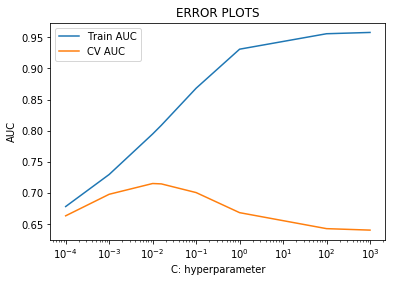

In [67]:
# Please write all the code with proper documentation
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
train_auc = []
cv_auc = []
c = [10**-4,10**-3,10**-2,10**-1.8,10**-1,1,10**2,10**3]
for i in tqdm(c):
    logi = LogisticRegression(C=i,class_weight={0 : 0.83 ,1 :0.17})
    logi.fit(bow_train, out_train)
    y_train_pred =  logi.predict_proba(bow_train)[:,1]
    y_cv_pred =  logi.predict_proba(bow_cv)[:,1]
    train_auc.append(roc_auc_score(out_train,y_train_pred))
    cv_auc.append(roc_auc_score(out_cv, y_cv_pred))
plt.plot(c, train_auc, label='Train AUC')
plt.plot(c, cv_auc, label='CV AUC')
plt.legend()
plt.xscale("log")
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.0001 ........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ C=0.0001, score=(train=0.673, test=0.662), total=   0.4s
[CV] C=0.0001 ........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ........ C=0.0001, score=(train=0.676, test=0.661), total=   0.5s
[CV] C=0.0001 ........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] ........ C=0.0001, score=(train=0.677, test=0.660), total=   0.5s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s


[CV] ......... C=0.001, score=(train=0.727, test=0.695), total=   0.9s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s


[CV] ......... C=0.001, score=(train=0.727, test=0.694), total=   0.9s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.3s remaining:    0.0s


[CV] ......... C=0.001, score=(train=0.730, test=0.687), total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.2s remaining:    0.0s


[CV] .......... C=0.01, score=(train=0.804, test=0.713), total=   1.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.9s remaining:    0.0s


[CV] .......... C=0.01, score=(train=0.802, test=0.712), total=   1.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.5s remaining:    0.0s


[CV] .......... C=0.01, score=(train=0.805, test=0.703), total=   1.6s
[CV] C=0.015848931924611134 ..........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    9.1s remaining:    0.0s


[CV]  C=0.015848931924611134, score=(train=0.820, test=0.712), total=   2.2s
[CV] C=0.015848931924611134 ..........................................
[CV]  C=0.015848931924611134, score=(train=0.819, test=0.711), total=   2.1s
[CV] C=0.015848931924611134 ..........................................
[CV]  C=0.015848931924611134, score=(train=0.822, test=0.702), total=   2.2s
[CV] C=0.1 ...........................................................
[CV] ........... C=0.1, score=(train=0.891, test=0.698), total=   3.4s
[CV] C=0.1 ...........................................................
[CV] ........... C=0.1, score=(train=0.888, test=0.695), total=   3.6s
[CV] C=0.1 ...........................................................
[CV] ........... C=0.1, score=(train=0.890, test=0.687), total=   3.7s
[CV] C=1 .............................................................
[CV] ............. C=1, score=(train=0.960, test=0.667), total=  11.7s
[CV] C=1 ..................................................

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  5.7min finished


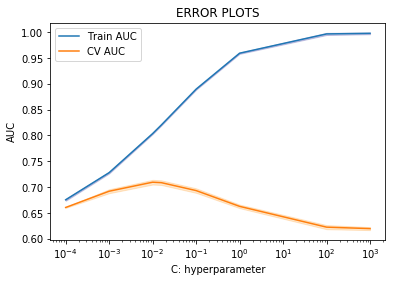

{'C': 0.01}


In [68]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

logi = LogisticRegression(class_weight={0 : 0.83 ,1 :0.17})
parameters = {"C" : [10**-4,10**-3,10**-2,10**-1.8,10**-1,1,10**2,10**3]}
clf = GridSearchCV(logi, parameters, cv=3, scoring='roc_auc',return_train_score=True,verbose=10)
clf.fit(bow_train, out_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(c, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(c,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(c, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(c,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.xscale("log")
plt.title("ERROR PLOTS")
plt.show()
print(clf.best_params_)
best_alpha=clf.best_params_['C']

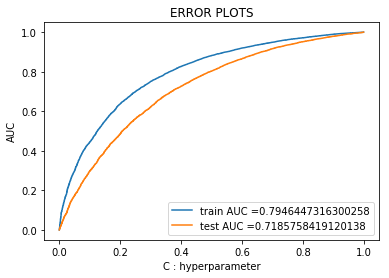

Train confusion matrix
[[ 5076  2349]
 [ 9827 31789]]
Test confusion matrix
[[ 3143  2318]
 [ 7768 22823]]


In [69]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


logi = LogisticRegression(C=best_alpha,class_weight={0 : 0.83 ,1 :0.17})
logi.fit(bow_train, out_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(out_train, logi.predict_proba(bow_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(out_test, logi.predict_proba(bow_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(out_train, logi.predict(bow_train)))
print("Test confusion matrix")
print(confusion_matrix(out_test, logi.predict(bow_test)))

100%|██████████| 8/8 [03:53<00:00, 63.11s/it]


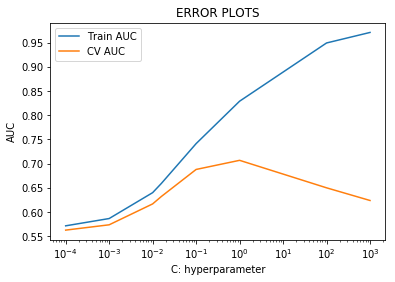

In [70]:
# Please write all the code with proper documentation
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
train_auc = []
cv_auc = []
c = [10**-4,10**-3,10**-2,10**-1.8,10**-1,1,10**2,10**3]
for i in tqdm(c):
    logi = LogisticRegression(C=i,class_weight={0 : 0.83 ,1 :0.17},n_jobs=-1)
    logi.fit(tfidf_train, out_train)
    y_train_pred =  logi.predict_proba(tfidf_train)[:,1]
    y_cv_pred =  logi.predict_proba(tfidf_cv)[:,1]
    train_auc.append(roc_auc_score(out_train,y_train_pred))
    cv_auc.append(roc_auc_score(out_cv, y_cv_pred))
plt.plot(c, train_auc, label='Train AUC')
plt.plot(c, cv_auc, label='CV AUC')
plt.legend()
plt.xscale("log")
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  5.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  5.7min finished


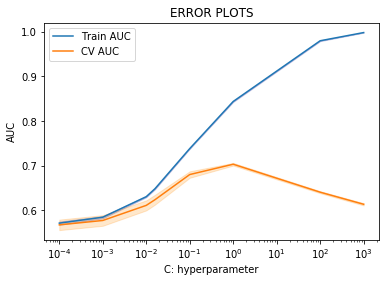

{'C': 1}


In [72]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

logi = LogisticRegression(class_weight={0 : 0.83 ,1 :0.17})
parameters = {"C" : [10**-4,10**-3,10**-2,10**-1.8,10**-1,1,10**2,10**3]}
clf = GridSearchCV(logi, parameters, cv=3, scoring='roc_auc',return_train_score=True,verbose=10,n_jobs=-1)
clf.fit(tfidf_train, out_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(c, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(c,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(c, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(c,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.xscale("log")
plt.title("ERROR PLOTS")
plt.show()
print(clf.best_params_)
best_alpha=clf.best_params_['C']

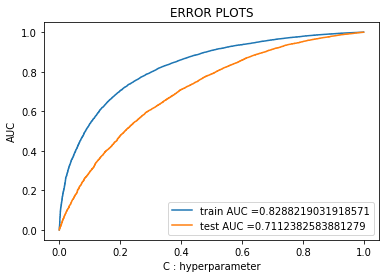

Train confusion matrix
[[ 5239  2186]
 [ 8652 32964]]
Test confusion matrix
[[ 2923  2538]
 [ 7278 23313]]


In [73]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


logi = LogisticRegression(C=best_alpha,class_weight={0 : 0.83 ,1 :0.17},n_jobs=-1)
logi.fit(tfidf_train, out_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(out_train, logi.predict_proba(tfidf_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(out_test, logi.predict_proba(tfidf_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(out_train, logi.predict(tfidf_train)))
print("Test confusion matrix")
print(confusion_matrix(out_test, logi.predict(tfidf_test)))

100%|██████████| 8/8 [06:15<00:00, 88.57s/it]


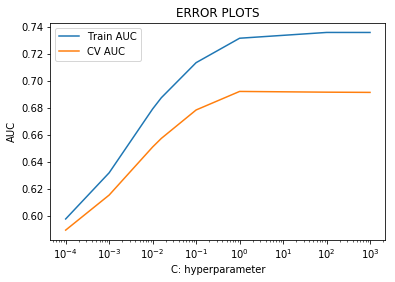

In [74]:
# Please write all the code with proper documentation
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
train_auc = []
cv_auc = []
c = [10**-4,10**-3,10**-2,10**-1.8,10**-1,1,10**2,10**3]
for i in tqdm(c):
    logi = LogisticRegression(C=i,class_weight={0 : 0.83 ,1 :0.17},n_jobs=-1)
    logi.fit(avg_w2v_train, out_train)
    y_train_pred =  logi.predict_proba(avg_w2v_train)[:,1]
    y_cv_pred =  logi.predict_proba(avg_w2v_cv)[:,1]
    train_auc.append(roc_auc_score(out_train,y_train_pred))
    cv_auc.append(roc_auc_score(out_cv, y_cv_pred))
plt.plot(c, train_auc, label='Train AUC')
plt.plot(c, cv_auc, label='CV AUC')
plt.legend()
plt.xscale("log")
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  8.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  8.6min finished


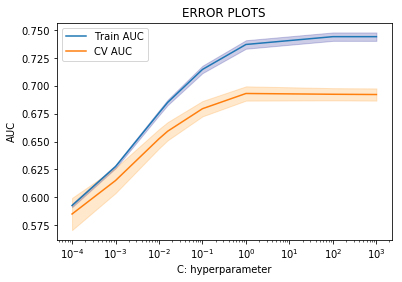

{'C': 1}


In [75]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

logi = LogisticRegression(class_weight={0 : 0.83 ,1 :0.17})
parameters = {"C" : [10**-4,10**-3,10**-2,10**-1.8,10**-1,1,10**2,10**3]}
clf = GridSearchCV(logi, parameters, cv=3, scoring='roc_auc',return_train_score=True,verbose=10,n_jobs=-1)
clf.fit(avg_w2v_train, out_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(c, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(c,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(c, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(c,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.xscale("log")
plt.title("ERROR PLOTS")
plt.show()
print(clf.best_params_)
best_alpha=clf.best_params_['C']

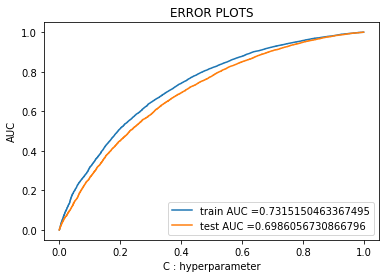

Train confusion matrix
[[ 4597  2828]
 [11475 30141]]
Test confusion matrix
[[ 3129  2332]
 [ 8619 21972]]


In [76]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


logi = LogisticRegression(C=best_alpha,class_weight={0 : 0.83 ,1 :0.17},n_jobs=-1)
logi.fit(avg_w2v_train, out_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(out_train, logi.predict_proba(avg_w2v_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(out_test, logi.predict_proba(avg_w2v_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(out_train, logi.predict(avg_w2v_train)))
print("Test confusion matrix")
print(confusion_matrix(out_test, logi.predict(avg_w2v_test)))

100%|██████████| 8/8 [04:31<00:00, 61.47s/it]


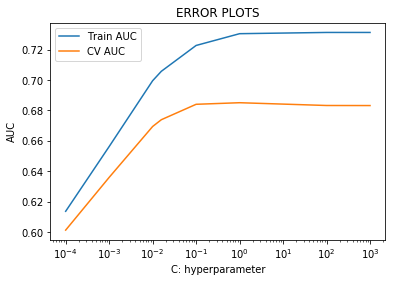

In [77]:
# Please write all the code with proper documentation
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
train_auc = []
cv_auc = []
c = [10**-4,10**-3,10**-2,10**-1.8,10**-1,1,10**2,10**3]
for i in tqdm(c):
    logi = LogisticRegression(C=i,class_weight={0 : 0.83 ,1 :0.17},n_jobs=-1)
    logi.fit(tif_w2v_train, out_train)
    y_train_pred =  logi.predict_proba(tif_w2v_train)[:,1]
    y_cv_pred =  logi.predict_proba(tif_w2v_cv)[:,1]
    train_auc.append(roc_auc_score(out_train,y_train_pred))
    cv_auc.append(roc_auc_score(out_cv, y_cv_pred))
plt.plot(c, train_auc, label='Train AUC')
plt.plot(c, cv_auc, label='CV AUC')
plt.legend()
plt.xscale("log")
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  6.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  6.3min finished


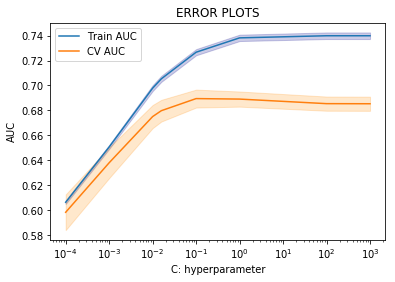

{'C': 0.1}


In [78]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

logi = LogisticRegression(class_weight={0 : 0.83 ,1 :0.17})
parameters = {"C" : [10**-4,10**-3,10**-2,10**-1.8,10**-1,1,10**2,10**3]}
clf = GridSearchCV(logi, parameters, cv=3, scoring='roc_auc',return_train_score=True,n_jobs=-1,verbose=10)
clf.fit(tif_w2v_train, out_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(c, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(c,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(c, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(c,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.xscale("log")
plt.title("ERROR PLOTS")
plt.show()
print(clf.best_params_)
best_alpha=clf.best_params_['C']

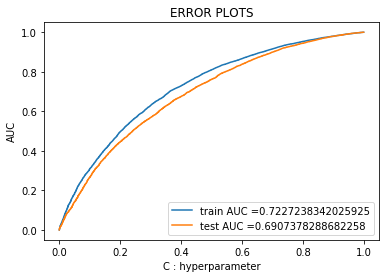

Train confusion matrix
[[ 4610  2815]
 [11906 29710]]
Test confusion matrix
[[ 3120  2341]
 [ 9147 21444]]


In [79]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


logi = LogisticRegression(C=best_alpha,class_weight={0 : 0.83 ,1 :0.17},n_jobs=-1)
logi.fit(tif_w2v_train, out_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(out_train, logi.predict_proba(tif_w2v_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(out_test, logi.predict_proba(tif_w2v_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(out_train, logi.predict(tif_w2v_train)))
print("Test confusion matrix")
print(confusion_matrix(out_test, logi.predict(tif_w2v_test)))

100%|██████████| 8/8 [00:04<00:00,  1.11it/s]


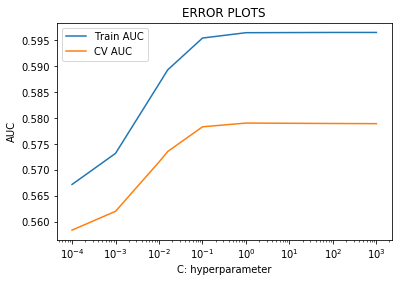

In [80]:
# Please write all the code with proper documentation
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
train_auc = []
cv_auc = []
c = [10**-4,10**-3,10**-2,10**-1.8,10**-1,1,10**2,10**3]
for i in tqdm(c):
    logi = LogisticRegression(C=i,class_weight={0 : 0.83 ,1 :0.17},n_jobs=-1)
    logi.fit(sentit_train, out_train)
    y_train_pred =  logi.predict_proba(sentit_train)[:,1]
    y_cv_pred =  logi.predict_proba(sentit_cv)[:,1]
    train_auc.append(roc_auc_score(out_train,y_train_pred))
    cv_auc.append(roc_auc_score(out_cv, y_cv_pred))
plt.plot(c, train_auc, label='Train AUC')
plt.plot(c, cv_auc, label='CV AUC')
plt.legend()
plt.xscale("log")
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.0001 ........................................................
[CV] ........ C=0.0001, score=(train=0.568, test=0.563), total=   0.1s
[CV] C=0.0001 ........................................................
[CV] ........ C=0.0001, score=(train=0.562, test=0.580), total=   0.0s
[CV] C=0.0001 ........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........ C=0.0001, score=(train=0.572, test=0.550), total=   0.0s
[CV] C=0.001 .........................................................
[CV] ......... C=0.001, score=(train=0.573, test=0.568), total=   0.1s
[CV] C=0.001 .........................................................
[CV] ......... C=0.001, score=(train=0.568, test=0.582), total=   0.1s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s


[CV] ......... C=0.001, score=(train=0.577, test=0.554), total=   0.1s
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.585, test=0.578), total=   0.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s


[CV] .......... C=0.01, score=(train=0.583, test=0.589), total=   0.1s
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.590, test=0.565), total=   0.1s
[CV] C=0.015848931924611134 ..........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s


[CV]  C=0.015848931924611134, score=(train=0.588, test=0.580), total=   0.1s
[CV] C=0.015848931924611134 ..........................................
[CV]  C=0.015848931924611134, score=(train=0.586, test=0.590), total=   0.1s
[CV] C=0.015848931924611134 ..........................................
[CV]  C=0.015848931924611134, score=(train=0.594, test=0.567), total=   0.1s
[CV] C=0.1 ...........................................................
[CV] ........... C=0.1, score=(train=0.596, test=0.586), total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ........... C=0.1, score=(train=0.594, test=0.591), total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ........... C=0.1, score=(train=0.602, test=0.572), total=   0.2s
[CV] C=1 .............................................................
[CV] ............. C=1, score=(train=0.598, test=0.585), total=   0.3s
[CV] C=1 ..................................................

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    8.3s finished


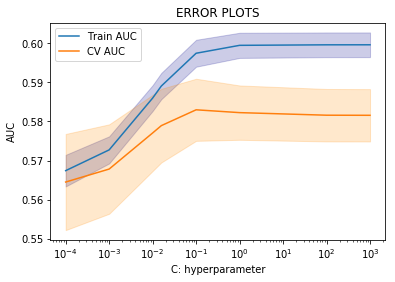

{'C': 0.1}


In [81]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

logi = LogisticRegression(class_weight={0 : 0.83 ,1 :0.17})
parameters = {"C" : [10**-4,10**-3,10**-2,10**-1.8,10**-1,1,10**2,10**3]}
clf = GridSearchCV(logi, parameters, cv=3, scoring='roc_auc',return_train_score=True,verbose=10)
clf.fit(sentit_train, out_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(c, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(c,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(c, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(c,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.xscale("log")
plt.title("ERROR PLOTS")
plt.show()
print(clf.best_params_)
best_alpha=clf.best_params_['C']

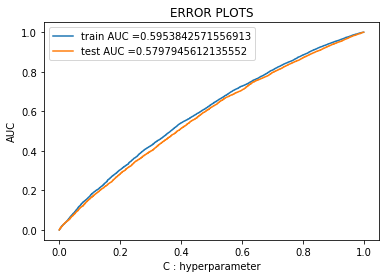

Train confusion matrix
[[ 2877  4548]
 [11002 30614]]
Test confusion matrix
[[ 2066  3395]
 [ 8240 22351]]


In [83]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


logi = LogisticRegression(C=best_alpha,class_weight={0 : 0.83 ,1 :0.17})
logi.fit(sentit_train, out_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(out_train, logi.predict_proba(sentit_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(out_test, logi.predict_proba(sentit_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(out_train, logi.predict(sentit_train)))
print("Test confusion matrix")
print(confusion_matrix(out_test, logi.predict(sentit_test)))

<h2>2.5 Logistic Regression with added Features `Set 5` </h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h1>3. Conclusion</h1>

In [0]:
# Please compare all your models using Prettytable library